# Razgony views prediction model
## Dara preprocessing

In [2]:
# Setup window width
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Import
import pandas as pd
import numpy as np
import datetime as dt
import joblib

# Set pandas options
pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 3)

# Plot
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# Load initial data
df = pd.read_csv("razgony.csv", sep=",", index_col="id")

In [4]:
df.tail()

,release_date,names,likes,dislikes,views,duration
id,,,,,,
84.0,2022-08-20,Костя Пушкин Давид Квахаджелидзе Лев Еременко...,28611,1242,810138,49.0
85.0,2022-09-10,Лев Еременко Дима Гаврилов Эдик Чернышенко Че...,29243,917,624249,49.5
86.0,2022-09-24,Лиза Аранова Дима Коваль Никита Дубровский Ди...,35580,801,732190,44.0
87.0,2022-10-08,Лев Еременко Денис Антипин Дима Колыбелкин На...,27032,1017,590184,50.0
88.0,2022-10-23,Дима Коваль Семен Деяк Вова Бухаров Николай А...,37169,809,590555,56.0


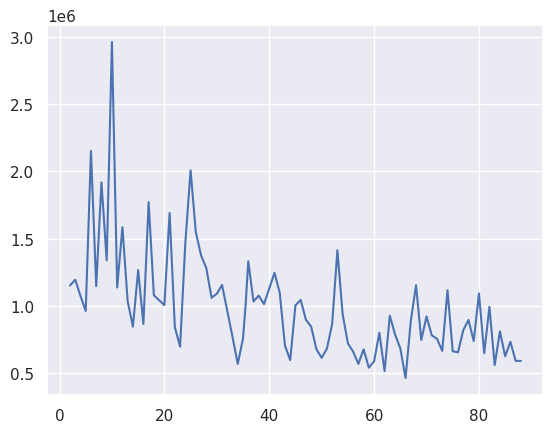

In [5]:
fig, ax = plt.subplots()
ax.plot(df.index, df["views"])
plt.show()

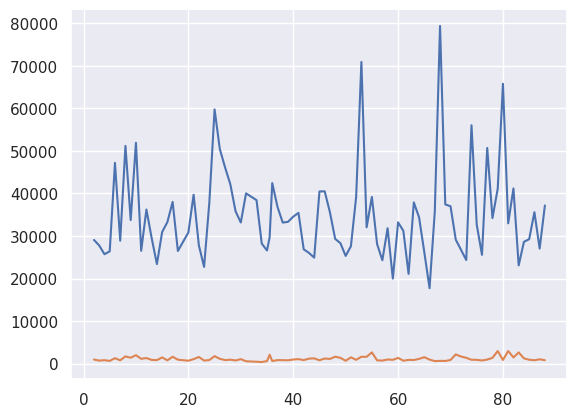

In [6]:
fig, ax = plt.subplots()
ax.plot(df.index, df["likes"])
ax.plot(df.index, df["dislikes"])
plt.show()

In [7]:
# Change dtype for release date
df["release_date"] = pd.to_datetime(df["release_date"]);

In [8]:
# Count video age for 2022-10-27 (parsing date)
df["age_days"] = (pd.to_datetime(dt.date(2022, 10, 27)) - df["release_date"]).dt.days

In [9]:
df

,release_date,names,likes,dislikes,views,duration,age_days
id,,,,,,,
2.0,2019-03-14,Вова Бухаров Вася Медведев Кирилл Селегей Жен...,29063,968,1151065,32.0,1323
3.0,2019-03-31,Алексей Шамутило Вова Бухаров Вася Медведев С...,27756,714,1193727,34.0,1306
4.0,2019-05-17,Сергей Орлов Вова Бухаров Коля Андреев Дима Г...,25704,809,1073530,25.0,1259
5.0,2019-06-11,Костя Пушкин Вова Бухаров Самвел Гиновян Вася...,26386,641,961325,26.0,1234
6.0,2019-07-04,Артур Чапарян Коля Андреев Саша Малой Эльдар ...,47177,1284,2151398,36.0,1211
...,...,...,...,...,...,...,...
84.0,2022-08-20,Костя Пушкин Давид Квахаджелидзе Лев Еременко...,28611,1242,810138,49.0,68
85.0,2022-09-10,Лев Еременко Дима Гаврилов Эдик Чернышенко Че...,29243,917,624249,49.5,47
86.0,2022-09-24,Лиза Аранова Дима Коваль Никита Дубровский Ди...,35580,801,732190,44.0,33


In [10]:
df["names"] = df["names"].str.split().apply(lambda lst: [f"{lst[i]}_{lst[i+1]}" for i in range(0, 10, 2)])

In [11]:
df["names"]

id
2.0     [Вова_Бухаров, Вася_Медведев, Кирилл_Селегей, ...
3.0     [Алексей_Шамутило, Вова_Бухаров, Вася_Медведев...
4.0     [Сергей_Орлов, Вова_Бухаров, Коля_Андреев, Дим...
5.0     [Костя_Пушкин, Вова_Бухаров, Самвел_Гиновян, В...
6.0     [Артур_Чапарян, Коля_Андреев, Саша_Малой, Эльд...
                              ...                        
84.0    [Костя_Пушкин, Давид_Квахаджелидзе, Лев_Еремен...
85.0    [Лев_Еременко, Дима_Гаврилов, Эдик_Чернышенко,...
86.0    [Лиза_Аранова, Дима_Коваль, Никита_Дубровский,...
87.0    [Лев_Еременко, Денис_Антипин, Дима_Колыбелкин,...
88.0    [Дима_Коваль, Семен_Деяк, Вова_Бухаров, Никола...
Name: names, Length: 86, dtype: object

In [12]:
# Generage a set with names for all participants
comics = set((name for row in df["names"] for name in row))

In [13]:
female_comics = {'Вера_Котельникова',
                 'Маргарита_Якобсон',
                 'Лиза_Аранова',
                 'Ариана_Лолаева',
                 'Туяна_Хоровиц',
                 'Наташа_Судьина',
                 'Соня_Медовщикова',
                 'Аля_Кокушкина',
                 'Ирина_Приходько',
                 'Яся_Тринадцатко',
                 'Ника_Тарасевич',
                 'Юля_Жеребцова',
                 'Ольга_Малащенко',
                 'Ярослава_Тринадцатко'}

In [14]:
# Generate comics_sex dictionary for further calculations and dump it to a file
comics_sex = {name: 0 if name in female_comics else 1 for name in comics}
joblib.dump(comics_sex, "./dumps/comics_sex.joblib")

['comics_sex.joblib']

In [179]:
df["males"] = np.nan;
df["females"] = np.nan;

In [180]:
# Calculate number of male and female participants
df["males"] = df["names"].apply(lambda lst: sum((comics_sex[name] for name in lst)))
df["females"] = df["names"].apply(lambda lst: sum((name in female_comics for name in lst)))

In [181]:
# Generate separate feature for all participants in every video
for name in comics:
    df[name] = df["names"].apply(lambda lst: 1 if name in lst else 0)

In [182]:
# Save data as CSV
df.to_csv("razgony_data.csv", sep=",", index_label="id")

In [183]:
df.iloc[:50, 1:]

,names,likes,dislikes,views,duration,age_days,males,females,Вова_Бухаров,Тимур_Джанкезов,Иван_Явиц,Юля_Жеребцова,Андрей_Цеховский,Нидаль_Абу-Газале,Костя_Широков,Ньургун_Атаков,Дима_Гаврилов,Гурам_Демидов,Фил_Воронин,Коля_Андреев,Толя_Бороздин,Давид_Квахаджелидзе,Саша_Киселев,Егор_Александров,Игорь_Тарлецкий,...,Саша_Малой,Дмитрий_Романов,Василий_Медведев,Ника_Тарасевич,Данил_Гугунава,Лука_Хиникадзе,Филипп_Воронин,Егор_Свирский,Лев_Еременко,Идрак_Мирзализаде,Гоша_Сморгуленко,Владимир_Бухаров,Павел_Кривец,Маргарита_Якобсон,Денис_Смирнов,Марк_Сергиенко,Вера_Котельникова,Сергей_Орлов,Женя_Сидоров,Сергей_Зорик,Дмитрий_Колыбелкин,Кирилл_Селегей,Лев_Марсел,Костя_Захарин,Ярослава_Тринадцатко
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,"[Вова_Бухаров, Вася_Медведев, Кирилл_Селегей, ...",29063,968,1151065,32.0,1323,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3.0,"[Алексей_Шамутило, Вова_Бухаров, Вася_Медведев...",27756,714,1193727,34.0,1306,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,"[Сергей_Орлов, Вова_Бухаров, Коля_Андреев, Дим...",25704,809,1073530,25.0,1259,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5.0,"[Костя_Пушкин, Вова_Бухаров, Самвел_Гиновян, В...",26386,641,961325,26.0,1234,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6.0,"[Артур_Чапарян, Коля_Андреев, Саша_Малой, Эльд...",47177,1284,2151398,36.0,1211,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7.0,"[Андрей_Шарапов, Вася_Медведев, Дмитрий_Романо...",28893,774,1146184,42.0,1186,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8.0,"[Ваня_Усович, Вася_Медведев, Саша_Малой, Коля_...",51156,1703,1917989,46.0,1181,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9.0,"[Дима_Гаврилов, Саша_Малой, Дима_Коваль, Вова_...",33725,1386,1338548,47.0,1138,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10.0,"[Сергей_Орлов, Идрак_Мирзализаде, Эльдар_Гусей...",51891,1985,2961458,64.0,1118,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
